## Effect of Scaling 
Recall that in our formulation of TMM, we are scaling the H-fields as
$$
\mathbf{H} \rightarrow i \eta_0 \mathbf{H}
$$

Since we are rescaling the H-fields by a complex factor in our TMM formalism, we must check that the E-field and H-field solutions in a homogeneous layer are no longer IN PHASE (H field should be off by a factor of $\pi/2$

WE also have a scaling of coordinates $z \rightarrow k_0 z$, but this is not as important

check on eigendecomp
2.0293072715139053e-17
(100, 4)


C:\Users\zhaon\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


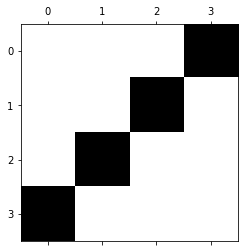

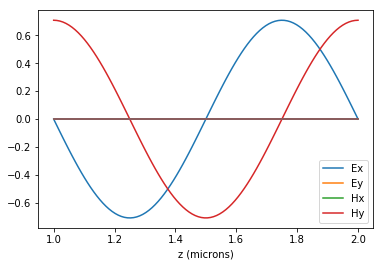

In [4]:
'''
unstable TMM formation to analyze the plane wave in an individual LHI
everything checks out
'''
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as LA
import cmath;

#specify incident wave parameters
L0 = 1e-6;
wavelengths = 1e-6; #;
k0 = 2*np.pi/wavelengths;

## initial amplitude as TE mode, with only Ey and Hx
c0 = np.matrix([0,0,0,1])*(1/np.sqrt(2));
#Ex, Ey, Hx, Hy
c0 = c0.T;

theta = 0; #normal incidence
phi = 0;
kx = 0; ky = 0;
e_r = 1; mu_r = 1;

# solution in an LHI layer
P = np.matrix([[kx*ky/mu_r, e_r - kx**2/mu_r],[ky**2/mu_r - e_r, -kx*ky/mu_r]])
Q = np.matrix([[kx*ky/e_r, mu_r - kx**2/e_r],[ky**2/e_r - mu_r, -kx*ky/e_r]])

Gamma = np.block([[np.zeros((2,2)), P],[Q, np.zeros((2,2))]])
plt.figure();
plt.spy(Gamma) #should be anti-diagonal

Lambda, W = np.linalg.eig(Gamma); #LAMBDa is effectively refractive index
eigen_matrix = np.diag(Lambda);

print('check on eigendecomp')
print(np.linalg.norm(W*eigen_matrix*np.linalg.inv(W) - Gamma)); #should be near zero

#sort lambda and W
argument_sort = np.argsort(Lambda);
lambda_sort = (np.sort(Lambda))
W_sort = W[:,argument_sort];
#if the solution is right, then we can iterate over Z and get a sinusoid

fields = list();
for z in np.linspace(0,1,100)*1e-6:
    X = np.matrix(LA.expm(-eigen_matrix*k0*z));
    #print(X)
    ## identifying the solution
    phi = np.array(W*X*np.linalg.inv(W)*c0);
    fields.append(np.squeeze(phi));

fields = np.array(fields);
print(fields.shape)
plt.figure()
plt.plot(np.linspace(1,2,100), np.real(fields[:,:])); #plotting the real part
plt.legend(['Ex', 'Ey', 'Hx', 'Hy'])
plt.plot(np.linspace(1,2,100), cmath.sqrt(-1)*np.imag(fields[:,2:])) #what does the imaginary field part encode?
plt.xlabel('z (microns)')
# remember that iwmu_0H = del (cross) E, but in this calculation
#the difference between H and E is simply the scaling of 1/er and 1/mu_r
# according to EMLab, the fields should be out of phase for each mode...,

plt.show()